In [11]:
# Primero instalar las librerías necesarias
!pip install pandas numpy yfinance fredapi matplotlib seaborn

FRED API KEY: 73be39590b688a9ca91a02451eed4cc5

# Obtención de variables macro

-FEDFUNDS: mensual, tasa porcentual anual, representa la tasa de interés promedio a la que las instituciones prestan fondos entre si durante la noche.

-PCEPI: mensual, índice, mide los cambios en los precios de bienes y servicios consumidos por hogares.

-INDPRO: mensual, índice, mide volumen de producción de la industria.

-RBUSBIS: mensual, índice, mide el valor promedio del dólar respecto a una canasta de otras monedas.

In [12]:
import pandas as pd
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

def extract_fred_series(api_key='73be39590b688a9ca91a02451eed4cc5'):
    """
    Extraer series específicas de FRED y combinarlas en un DataFrame
    """
    print("📊 EXTRAYENDO SERIES DE FRED")
    print("="*40)

    # Inicializar FRED API
    fred = Fred(api_key=api_key)

    # Series a extraer
    series_codes = {
        'FEDFUNDS': 'Federal Funds Rate',
        'PCEPI': 'PCE Price Index',
        'INDPRO': 'Industrial Production Index',
        'RBUSBIS': 'Real Broad US Dollar Index'
    }

    # DataFrame para almacenar todas las series
    df = pd.DataFrame()

    # Extraer cada serie
    for code, description in series_codes.items():
        try:
            print(f"📈 Extrayendo {code} - {description}...")

            # Obtener toda la data histórica disponible
            series = fred.get_series(code)

            if not series.empty:
                df[code] = series
                print(f"   ✅ {len(series)} observaciones desde {series.index.min()} hasta {series.index.max()}")
            else:
                print(f"   ⚠️ Sin datos para {code}")

        except Exception as e:
            print(f"   ❌ Error con {code}: {e}")

    # Información del DataFrame combinado
    print("\n📋 DATAFRAME COMBINADO:")
    print(f"   - Variables: {len(df.columns)}")
    print(f"   - Observaciones totales: {len(df)}")

    if not df.empty:
        print(f"   - Rango temporal: {df.index.min()} a {df.index.max()}")
        print(f"   - Observaciones válidas después de combinar: {len(df.dropna())}")

    # Mostrar información de cada serie
    print("\n📊 INFORMACIÓN POR SERIE:")
    for col in df.columns:
        valid_data = df[col].dropna()
        print(f"   {col:<10}: {len(valid_data)} obs válidas "
              f"({valid_data.index.min()} a {valid_data.index.max()})")

    # Estadísticas básicas
    if not df.empty:
        print("\n📈 ESTADÍSTICAS BÁSICAS:")
        print(df.describe().round(3))

    return df


# Función principal
def main():
    """
    Ejecutar extracción completa
    """
    print("🚀 INICIANDO EXTRACCIÓN DE DATOS FRED")
    print("API Key configurada ✅\n")

    # Extraer datos
    combined_df = extract_fred_series()

    if not combined_df.empty:
        print("\n🎉 ¡EXTRACCIÓN COMPLETADA EXITOSAMENTE!")
        print(f"📊 DataFrame final: {combined_df.shape[0]} filas × {combined_df.shape[1]} columnas")

        return combined_df
    else:
        print("\n❌ No se pudieron extraer los datos")
        return None

# Ejecutar
if __name__ == "__main__":
    result_df = main()

    # Mostrar primeras filas si hay datos
    if result_df is not None and not result_df.empty:
        print("\n📋 PRIMERAS 10 OBSERVACIONES:")
        print(result_df.head(10).round(3))

🚀 INICIANDO EXTRACCIÓN DE DATOS FRED
API Key configurada ✅

📊 EXTRAYENDO SERIES DE FRED
📈 Extrayendo FEDFUNDS - Federal Funds Rate...
   ✅ 855 observaciones desde 1954-07-01 00:00:00 hasta 2025-09-01 00:00:00
📈 Extrayendo PCEPI - PCE Price Index...
   ✅ 800 observaciones desde 1959-01-01 00:00:00 hasta 2025-08-01 00:00:00
📈 Extrayendo INDPRO - Industrial Production Index...
   ✅ 1280 observaciones desde 1919-01-01 00:00:00 hasta 2025-08-01 00:00:00
📈 Extrayendo RBUSBIS - Real Broad US Dollar Index...
   ✅ 381 observaciones desde 1994-01-01 00:00:00 hasta 2025-09-01 00:00:00

📋 DATAFRAME COMBINADO:
   - Variables: 4
   - Observaciones totales: 855
   - Rango temporal: 1954-07-01 00:00:00 a 2025-09-01 00:00:00
   - Observaciones válidas después de combinar: 380

📊 INFORMACIÓN POR SERIE:
   FEDFUNDS  : 855 obs válidas (1954-07-01 00:00:00 a 2025-09-01 00:00:00)
   PCEPI     : 800 obs válidas (1959-01-01 00:00:00 a 2025-08-01 00:00:00)
   INDPRO    : 854 obs válidas (1954-07-01 00:00:00 a 

In [13]:
# Asegurar que el índice sea de tipo datetime y tenga frecuencia mensual
combined_df_monthly = result_df.resample('MS').first()

# Encontrar el rango de fechas donde todas las series tienen datos (después del resample)
start_date = combined_df_monthly.first_valid_index()
end_date = combined_df_monthly.last_valid_index()

# Filtrar el DataFrame por este rango de fechas común
fixed_macro_data = combined_df_monthly.loc[start_date:end_date]

# Opcional: Rellenar NaNs si es necesario (por ejemplo, con el valor anterior o una interpolación)
# Aquí usamos forward fill para los NaNs que puedan quedar dentro del rango común
fixed_macro_data = fixed_macro_data.fillna(method='ffill').fillna(method='bfill')

print("DataFrame combinado con rango de fechas común:")
display(fixed_macro_data.head())
display(fixed_macro_data.tail())
print(f"Shape del DataFrame final: {fixed_macro_data.shape}")

DataFrame combinado con rango de fechas común:


,FEDFUNDS,PCEPI,INDPRO,RBUSBIS
1954-07-01,0.80,15.164,18.0907,88.69
1954-08-01,1.22,15.164,18.0639,88.69
1954-09-01,1.07,15.164,18.0908,88.69
1954-10-01,0.85,15.164,18.3058,88.69
1954-11-01,0.83,15.164,18.6015,88.69


,FEDFUNDS,PCEPI,INDPRO,RBUSBIS
2025-05-01,4.33,126.380,103.6570,109.90
2025-06-01,4.33,126.743,104.2115,108.71
2025-07-01,4.33,126.949,103.8194,108.04
2025-08-01,4.33,127.285,103.9203,108.70
2025-09-01,4.22,127.285,103.9203,108.18


Shape del DataFrame final: (855, 4)


Codigo para exportar a Excel el df

In [14]:
# Exportar el DataFrame fixed_macro_data a un archivo de Excel
excel_filename = 'macro_data_cleaned.xlsx'
fixed_macro_data.to_excel(excel_filename)

print(f"DataFrame 'fixed_macro_data' exportado a '{excel_filename}' exitosamente.")

DataFrame 'fixed_macro_data' exportado a 'macro_data_cleaned.xlsx' exitosamente.


# Obtención de datos financieros

-S&P500: diario a mensual, último dato del mes. Datos desde 1950

-VIX: diario a mensual, promedio mensual. Datos desde 1990

In [15]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def extract_sp500_vix_simple():
    """
    Extraer solo S&P 500 y VIX desde Yahoo Finance
    Sin variables adicionales - solo las series básicas
    """
    print("📊 EXTRAYENDO S&P 500 Y VIX - SERIES BÁSICAS")
    print("="*45)

    # DataFrame para almacenar datos
    df = pd.DataFrame()

    # ==========================================
    # 1. S&P 500 (^GSPC)
    # ==========================================
    print("\n📈 EXTRAYENDO S&P 500 (^GSPC)...")

    try:
        # Extraer desde 1950 para obtener máxima historia
        sp500_data = yf.download('^GSPC', start='1950-01-01', end=datetime.now().strftime('%Y-%m-%d'), progress=False)

        if not sp500_data.empty:
            # Usar precio de cierre ajustado
            sp500_daily = sp500_data['Close']

            # Convertir a mensual (último valor del mes)
            sp500_monthly = sp500_daily.resample('M').last()

            df['SP500'] = sp500_monthly

            print(f"   ✅ S&P 500 extraído exitosamente")
            print(f"   📊 {len(sp500_monthly)} observaciones mensuales")
            print(f"   📅 Desde: {sp500_monthly.index.min().strftime('%Y-%m-%d')}")
            print(f"   📅 Hasta: {sp500_monthly.index.max().strftime('%Y-%m-%d')}")

        else:
            print("   ❌ No se pudieron obtener datos del S&P 500")

    except Exception as e:
        print(f"   ❌ Error extrayendo S&P 500: {e}")

    # ==========================================
    # 2. VIX (^VIX)
    # ==========================================
    print("\n📊 EXTRAYENDO VIX (^VIX)...")

    try:
        # Extraer desde 1985 para obtener máxima historia del VIX
        vix_data = yf.download('^VIX', start='1985-01-01', end=datetime.now().strftime('%Y-%m-%d'), progress=False)

        if not vix_data.empty:
            # Usar precio de cierre
            vix_daily = vix_data['Close']

            # Convertir a mensual (promedio del mes)
            vix_monthly = vix_daily.resample('M').mean()

            df['VIX'] = vix_monthly

            print(f"   ✅ VIX extraído exitosamente")
            print(f"   📊 {len(vix_monthly)} observaciones mensuales")
            print(f"   📅 Desde: {vix_monthly.index.min().strftime('%Y-%m-%d')}")
            print(f"   📅 Hasta: {vix_monthly.index.max().strftime('%Y-%m-%d')}")

        else:
            print("   ❌ No se pudieron obtener datos del VIX")

    except Exception as e:
        print(f"   ❌ Error extrayendo VIX: {e}")

    # ==========================================
    # 3. RESUMEN FINAL
    # ==========================================
    print("\n📋 DATASET FINAL:")
    print(f"   - Variables: {list(df.columns)}")
    print(f"   - Observaciones totales: {len(df)}")

    if not df.empty:
        print(f"   - Período completo: {df.index.min().strftime('%Y-%m')} a {df.index.max().strftime('%Y-%m')}")

        # Información por variable
        for col in df.columns:
            valid_data = df[col].dropna()
            if not valid_data.empty:
                print(f"   - {col}: {len(valid_data)} observaciones válidas")

        # Período común
        common_data = df.dropna()
        if not common_data.empty:
            print(f"   - Período común: {len(common_data)} observaciones")
            print(f"   - Desde: {common_data.index.min().strftime('%Y-%m')}")
            print(f"   - Hasta: {common_data.index.max().strftime('%Y-%m')}")

        # Estadísticas básicas
        print("\n📈 ESTADÍSTICAS BÁSICAS:")
        print(df.describe().round(2))

    return df

def export_data(df, filename='sp500_vix_simple.csv'):
    """
    Exportar datos a CSV
    """
    if not df.empty:
        df.to_csv(filename)
        print(f"\n💾 Datos exportados a: {filename}")
        return True
    else:
        print("\n❌ No hay datos para exportar")
        return False

def main():
    """
    Ejecutar extracción simple
    """
    print("🚀 EXTRACCIÓN SIMPLE: S&P 500 Y VIX")
    print("Solo series básicas, sin transformaciones")
    print("="*45)

    # Extraer datos
    df = extract_sp500_vix_simple()

    if not df.empty:
        # Exportar
        export_data(df)

        print("\n🎉 ¡EXTRACCIÓN COMPLETADA!")
        print(f"📊 {df.shape[0]} filas × {df.shape[1]} columnas")

        return df
    else:
        print("\n❌ No se pudieron extraer los datos")
        return None

# Ejecutar
if __name__ == "__main__":
    result_df = main()

    # Mostrar muestra
    if result_df is not None and not result_df.empty:
        print("\n📋 MUESTRA DE DATOS:")
        print(result_df.head(10).round(2))
        print("\n...")
        print(result_df.tail(5).round(2))

🚀 EXTRACCIÓN SIMPLE: S&P 500 Y VIX
Solo series básicas, sin transformaciones
📊 EXTRAYENDO S&P 500 Y VIX - SERIES BÁSICAS

📈 EXTRAYENDO S&P 500 (^GSPC)...
   ✅ S&P 500 extraído exitosamente
   📊 910 observaciones mensuales
   📅 Desde: 1950-01-31
   📅 Hasta: 2025-10-31

📊 EXTRAYENDO VIX (^VIX)...
   ✅ VIX extraído exitosamente
   📊 430 observaciones mensuales
   📅 Desde: 1990-01-31
   📅 Hasta: 2025-10-31

📋 DATASET FINAL:
   - Variables: ['SP500', 'VIX']
   - Observaciones totales: 910
   - Período completo: 1950-01 a 2025-10
   - SP500: 910 observaciones válidas
   - VIX: 430 observaciones válidas
   - Período común: 430 observaciones
   - Desde: 1990-01
   - Hasta: 2025-10

📈 ESTADÍSTICAS BÁSICAS:
         SP500     VIX
count   910.00  430.00
mean    906.23   19.47
std    1291.75    7.43
min      17.05   10.13
25%      89.28   14.08
50%     272.76   17.69
75%    1269.41   23.05
max    6791.69   62.64

💾 Datos exportados a: sp500_vix_simple.csv

🎉 ¡EXTRACCIÓN COMPLETADA!
📊 910 filas × 2

In [16]:
# Asegurar que el índice sea de tipo datetime y tenga frecuencia mensual
# Aunque yfinance ya devuelve un DatetimeIndex, resample('MS') lo asegura y establece la frecuencia
sp500_vix_monthly = result_df.resample('MS').first()

# Encontrar el rango de fechas donde ambas series tienen datos (después del resample)
# Usamos dropna() para encontrar el primer y último índice donde *ambas* columnas tienen datos
common_period_df = sp500_vix_monthly.dropna()

if not common_period_df.empty:
    start_date_financial = common_period_df.index.min()
    end_date_financial = common_period_df.index.max()

    # Filtrar el DataFrame original resampleado por este rango de fechas común
    fixed_financial_data = sp500_vix_monthly.loc[start_date_financial:end_date_financial]

    # Opcional: Rellenar NaNs si es necesario dentro del rango común (menos probable aquí)
    # fixed_financial_data = fixed_financial_data.fillna(method='ffill').fillna(method='bfill')

    print("DataFrame financiero combinado con rango de fechas común:")
    display(fixed_financial_data.head())
    display(fixed_financial_data.tail())
    print(f"Shape del DataFrame final: {fixed_financial_data.shape}")
else:
    fixed_financial_data = pd.DataFrame()
    print("No se encontró un período de fechas común con datos válidos para ambas series.")

DataFrame financiero combinado con rango de fechas común:


,SP500,VIX
Date,,
1990-01-01,329.079987,23.347273
1990-02-01,331.890015,23.262632
1990-03-01,339.940002,20.062273
1990-04-01,330.799988,21.403500
1990-05-01,361.230011,18.097727


,SP500,VIX
Date,,
2025-06-01,6204.950195,18.215000
2025-07-01,6339.390137,16.331363
2025-08-01,6460.259766,15.750000
2025-09-01,6688.459961,15.773333
2025-10-01,6791.689941,18.472778


Shape del DataFrame final: (430, 2)


# Economías Emergentes

## Opción 1: País vs EEUU

En esta opción vamos a obtener el EMBI, EMAE o IPI de cada país individual y vamos a construir un VAR estructural para verificar el spillover de la FED -> País individual.

### EMBI Chile, Brasil, Mexico y Argentina

Notas:


*  Descargado desde la API de alphacast. Diarios, resampleo a mensual usando promedio
* Diarios: 6537 observaciones, Mensuales: 216 observaciones






In [17]:
"""
DESCARGA EMBI - ALPHACAST API
Datos de riesgo país (EMBI) para Argentina, Brasil, Chile y México
"""

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def install_alphacast():
    """
    Instalar librería Alphacast si no está instalada
    """
    try:
        import alphacast
        print("✅ Alphacast ya instalado")
    except ImportError:
        print("📦 Instalando Alphacast...")
        import subprocess
        subprocess.check_call(['pip', 'install', 'alphacast', '-q'])
        print("✅ Alphacast instalado")

def download_embi_alphacast(api_key="ak_ecUtwCADRa9LWX7TtcwA", dataset_id=5293):
    """
    Descargar datos EMBI desde Alphacast

    Parameters:
    -----------
    api_key : str
        API key de Alphacast
    dataset_id : int
        ID del dataset EMBI (5293)
    """

    print("📊 DESCARGANDO EMBI - ALPHACAST API")
    print("="*50)

    # Asegurar que Alphacast está instalado
    install_alphacast()

    # Importar después de instalar
    from alphacast import Alphacast

    try:
        # Conectar a Alphacast
        print(f"🔐 Conectando a Alphacast...")
        print(f"   Dataset ID: {dataset_id}")

        alphacast = Alphacast(api_key)
        dataset = alphacast.datasets.dataset(dataset_id)

        print("   ✅ Conexión exitosa")

        # Descargar datos directamente a pandas
        print("\n📥 Descargando datos...")
        print("   Países: Argentina, Brasil, Chile, México")

        df = dataset.download_data(
            format="pandas",
            startDate=None,  # Todas las fechas disponibles
            endDate=None,
            filterVariables=[],
            filterEntities={
                "country": ["Argentina", "Brazil", "Chile", "Mexico"]
            }
        )

        print(f"   ✅ Datos descargados: {df.shape[0]} filas × {df.shape[1]} columnas")

        # Mostrar información del DataFrame
        print("\n📋 ESTRUCTURA DE DATOS:")
        print(f"   Columnas: {list(df.columns)}")
        print(f"\n   Primeras filas:")
        print(df.head())

        return df

    except Exception as e:
        print(f"❌ Error descargando datos: {e}")
        import traceback
        traceback.print_exc()
        return None

def process_embi_data(df):
    """
    Procesar y limpiar datos EMBI de Alphacast
    """

    print("\n🔧 PROCESANDO DATOS EMBI")
    print("="*50)

    if df is None or df.empty:
        print("❌ No hay datos para procesar")
        return None

    # Identificar columnas relevantes
    print("📋 Columnas disponibles:")
    for col in df.columns:
        print(f"   - {col}")

    # Intentar identificar columna de fecha
    date_cols = [col for col in df.columns if 'date' in col.lower() or 'fecha' in col.lower()]

    if date_cols:
        date_col = date_cols[0]
        print(f"\n📅 Columna de fecha detectada: {date_col}")

        # Convertir a datetime
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

        # Establecer como índice
        df_processed = df.set_index(date_col)
    else:
        print("⚠️ No se detectó columna de fecha automáticamente")
        df_processed = df.copy()

    # Identificar columna de país
    country_cols = [col for col in df.columns if 'country' in col.lower() or 'pais' in col.lower()]

    if country_cols:
        country_col = country_cols[0]
        print(f"🌍 Columna de país detectada: {country_col}")
        print(f"   Países únicos: {df[country_col].unique()}")

    # Identificar columna de EMBI/spread
    value_cols = [col for col in df.columns if 'embi' in col.lower() or 'spread' in col.lower() or 'value' in col.lower()]

    if value_cols:
        value_col = value_cols[0]
        print(f"📊 Columna de valores detectada: {value_col}")

    print(f"\n✅ Datos procesados: {len(df_processed)} observaciones")

    return df_processed

def pivot_by_country(df):
    """
    Reorganizar datos con un país por columna
    """

    print("\n🔄 REORGANIZANDO DATOS POR PAÍS")
    print("="*50)

    if df is None or df.empty:
        return None

    # Identificar columnas clave
    country_col = None
    value_col = None

    for col in df.columns:
        if 'country' in col.lower():
            country_col = col
        elif 'embi' in col.lower() or 'value' in col.lower() or 'spread' in col.lower():
            value_col = col

    if not country_col or not value_col:
        print("⚠️ No se pudieron identificar columnas de país y valor")
        print("   Retornando datos sin pivotar")
        return df

    print(f"   Pivotando por: {country_col}")
    print(f"   Valores de: {value_col}")

    # Pivotar: índice = fecha, columnas = países, valores = EMBI
    try:
        df_pivot = df.pivot_table(
            values=value_col,
            index=df.index,
            columns=country_col,
            aggfunc='mean'  # Por si hay duplicados
        )

        print(f"   ✅ Datos pivotados: {df_pivot.shape[0]} filas × {df_pivot.shape[1]} columnas")
        print(f"   📋 Países: {list(df_pivot.columns)}")

        # Renombrar columnas para que sean más claras
        df_pivot.columns = [f'EMBI_{country}' for country in df_pivot.columns]

        return df_pivot

    except Exception as e:
        print(f"⚠️ Error pivotando: {e}")
        return df

def show_summary(df):
    """
    Mostrar resumen estadístico de los datos
    """

    print("\n📊 RESUMEN ESTADÍSTICO")
    print("="*50)

    if df is None or df.empty:
        print("❌ No hay datos para resumir")
        return

    # Información general
    print(f"📅 Período: {df.index.min()} a {df.index.max()}")
    print(f"📊 Observaciones: {len(df)}")
    print(f"🌍 Países/Variables: {len(df.columns)}")

    # Estadísticas por columna
    print("\n📈 ESTADÍSTICAS POR PAÍS:")
    stats = df.describe().round(2)
    print(stats)

    # Datos faltantes
    print("\n⚠️ DATOS FALTANTES:")
    missing = df.isnull().sum()
    for col in missing.index:
        if missing[col] > 0:
            pct = (missing[col] / len(df)) * 100
            print(f"   {col}: {missing[col]} ({pct:.1f}%)")
        else:
            print(f"   {col}: ✅ Completo")

def export_embi(df, filename='embi_alphacast.csv'):
    """
    Exportar datos EMBI a CSV
    """

    print(f"\n💾 EXPORTANDO DATOS")
    print("="*50)

    if df is None or df.empty:
        print("❌ No hay datos para exportar")
        return False

    df.to_csv(filename)

    print(f"   ✅ Archivo exportado: {filename}")
    print(f"   📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")

    return True

def main():
    """
    Función principal para descargar y procesar EMBI
    """

    print("🚀 DESCARGA EMBI - ALPHACAST")
    print("Países: Argentina, Brasil, Chile, México")
    print("="*60)

    # PASO 1: Descargar datos
    df_raw = download_embi_alphacast()

    if df_raw is None:
        print("\n❌ Descarga falló")
        return None

    # PASO 2: Procesar datos
    df_processed = process_embi_data(df_raw)

    # PASO 3: Pivotar por país
    df_pivot = pivot_by_country(df_processed)

    # PASO 4: Mostrar resumen
    show_summary(df_pivot)

    # PASO 5: Exportar
    export_embi(df_pivot)

    # PASO 6: Mostrar muestra
    print("\n📋 MUESTRA DE DATOS FINALES:")
    print("="*60)
    print("Primeras 10 observaciones:")
    print(df_pivot.head(10).round(2))
    print("\nÚltimas 5 observaciones:")
    print(df_pivot.tail(5).round(2))

    print("\n🎉 ¡DESCARGA COMPLETADA EXITOSAMENTE!")
    print("📁 Archivo: embi_alphacast.csv")

    return df_pivot

# Ejecutar
if __name__ == "__main__":
    embi_data = main()

🚀 DESCARGA EMBI - ALPHACAST
Países: Argentina, Brasil, Chile, México
📊 DESCARGANDO EMBI - ALPHACAST API
✅ Alphacast ya instalado
🔐 Conectando a Alphacast...
   Dataset ID: 5293
   ✅ Conexión exitosa

📥 Descargando datos...
   Países: Argentina, Brasil, Chile, México
   ✅ Datos descargados: 26264 filas × 5 columnas

📋 ESTRUCTURA DE DATOS:
   Columnas: ['Date', 'country', 'EMBI Global Diversified Subindices', 'EMBI Global Diversified Subindices - 30d_change', 'EMBI Global Diversified Subindices - 30d_running_av']

   Primeras filas:
         Date    country  EMBI Global Diversified Subindices  \
0  2007-10-29  Argentina                             3.50066   
1  2007-10-29     Brazil                             1.74591   
2  2007-10-29      Chile                             1.12264   
3  2007-10-29     Mexico                             1.25739   
4  2007-10-30  Argentina                             3.40902   

   EMBI Global Diversified Subindices - 30d_change  \
0                       

📊 Generando gráfico de líneas con Argentina en eje secundario...


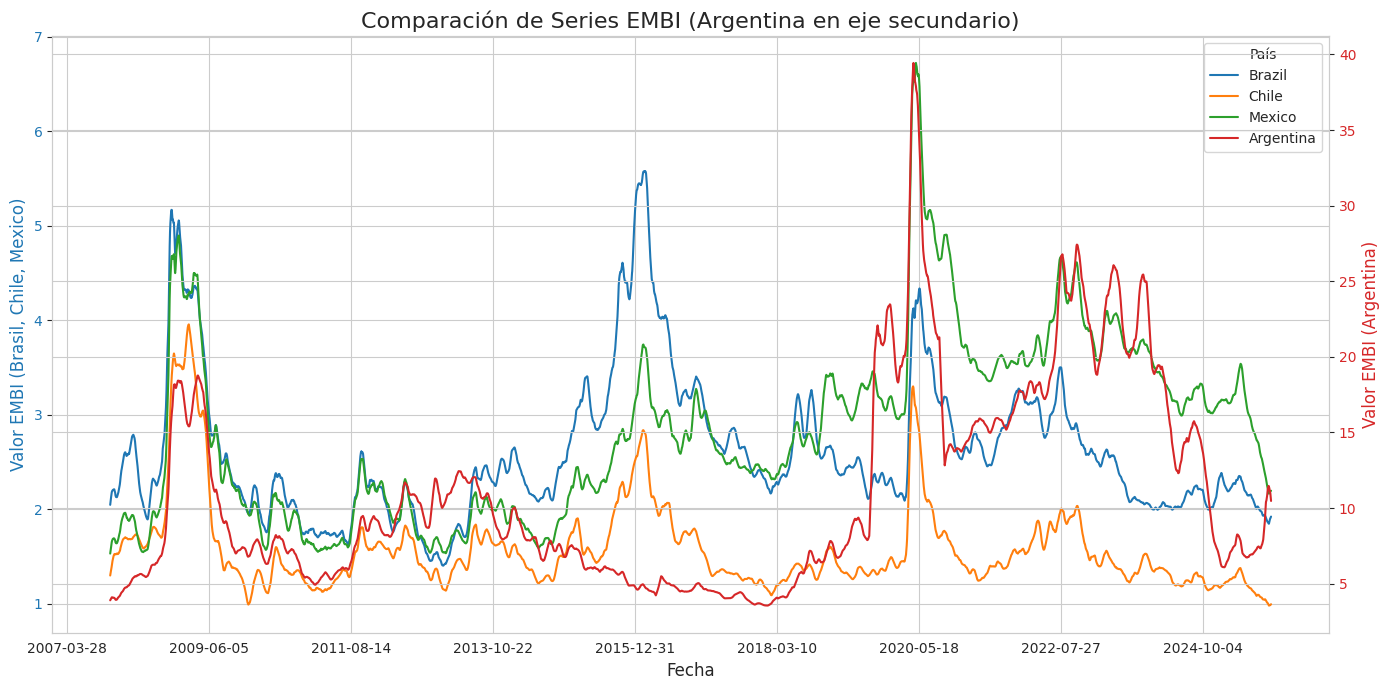

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Asegurarse de que el DataFrame embi_data existe y no está vacío
if 'embi_data' in locals() and not embi_data.empty:

    print("📊 Generando gráfico de líneas con Argentina en eje secundario...")

    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot Brazil, Chile, and Mexico on the primary y-axis (ax1)
    countries_on_ax1 = ['EMBI_Brazil', 'EMBI_Chile', 'EMBI_Mexico']
    for col in countries_on_ax1:
        if col in embi_data.columns:
            ax1.plot(embi_data.index, embi_data[col], label=col.replace('EMBI_', ''))

    ax1.set_xlabel('Fecha', fontsize=12)
    ax1.set_ylabel('Valor EMBI (Brasil, Chile, Mexico)', fontsize=12, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.grid(True)

    # Create a secondary y-axis for Argentina
    ax2 = ax1.twinx()
    argentina_col = 'EMBI_Argentina'
    if argentina_col in embi_data.columns:
        ax2.plot(embi_data.index, embi_data[argentina_col], label=argentina_col.replace('EMBI_', ''), color='tab:red')

    ax2.set_ylabel('Valor EMBI (Argentina)', fontsize=12, color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add titles and legends
    plt.title('Comparación de Series EMBI (Argentina en eje secundario)', fontsize=16)

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, title='País', loc='upper right')

    # Formatear el eje x para mostrar fechas de manera legible
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) # Limitar el número de ticks principales
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x

    # Ajustar diseño para evitar solapamiento
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()
else:
    print("❌ El DataFrame 'embi_data' no está disponible o está vacío.")
    print("Asegúrate de haber ejecutado la celda que genera 'embi_data'.")

Resampleo a mensual

In [19]:
# Resample the daily embi_data DataFrame to monthly frequency using the average
if 'embi_data' in locals() and not embi_data.empty:
    print("🔄 Resampling daily embi_data to monthly (average)...")

    # Resample to monthly frequency (start of month) and calculate the mean for each month
    embi_monthly_avg_df = embi_data.resample('MS').mean()

    print(f"   ✅ Data resampled: {embi_monthly_avg_df.shape[0]} rows × {embi_monthly_avg_df.shape[1]} columns")
    print(f"   📅 Period: {embi_monthly_avg_df.index.min()} to {embi_monthly_avg_df.index.max()}")

    # Display the resulting monthly average DataFrame
    print("\n📋 Monthly EMBI Data (Average):")
    display(embi_monthly_avg_df.head())
    display(embi_monthly_avg_df.tail())
else:
    print("❌ The 'embi_data' DataFrame is not available or is empty.")
    print("Please ensure the cell that generates 'embi_data' has been executed.")

🔄 Resampling daily embi_data to monthly (average)...
   ✅ Data resampled: 216 rows × 4 columns
   📅 Period: 2007-11-01 00:00:00 to 2025-10-01 00:00:00

📋 Monthly EMBI Data (Average):


,EMBI_Argentina,EMBI_Brazil,EMBI_Chile,EMBI_Mexico
Date,,,,
2007-11-01,3.933884,2.073852,1.316427,1.553186
2007-12-01,4.033321,2.177126,1.474408,1.662832
2008-01-01,4.154600,2.241123,1.558874,1.734390
2008-02-01,4.643509,2.549153,1.686736,1.934493
2008-03-01,5.001410,2.646728,1.684045,1.903029


,EMBI_Argentina,EMBI_Brazil,EMBI_Chile,EMBI_Mexico
Date,,,,
2025-06-01,6.803155,2.154641,1.182155,3.027114
2025-07-01,7.060392,2.076029,1.122930,2.821102
2025-08-01,7.412358,1.998397,1.079907,2.640378
2025-09-01,9.187309,1.919551,1.037737,2.384518
2025-10-01,11.141698,1.878152,0.989643,2.188235


📊 Generando gráfico de líneas para comparar las series EMBI mensuales promedio...


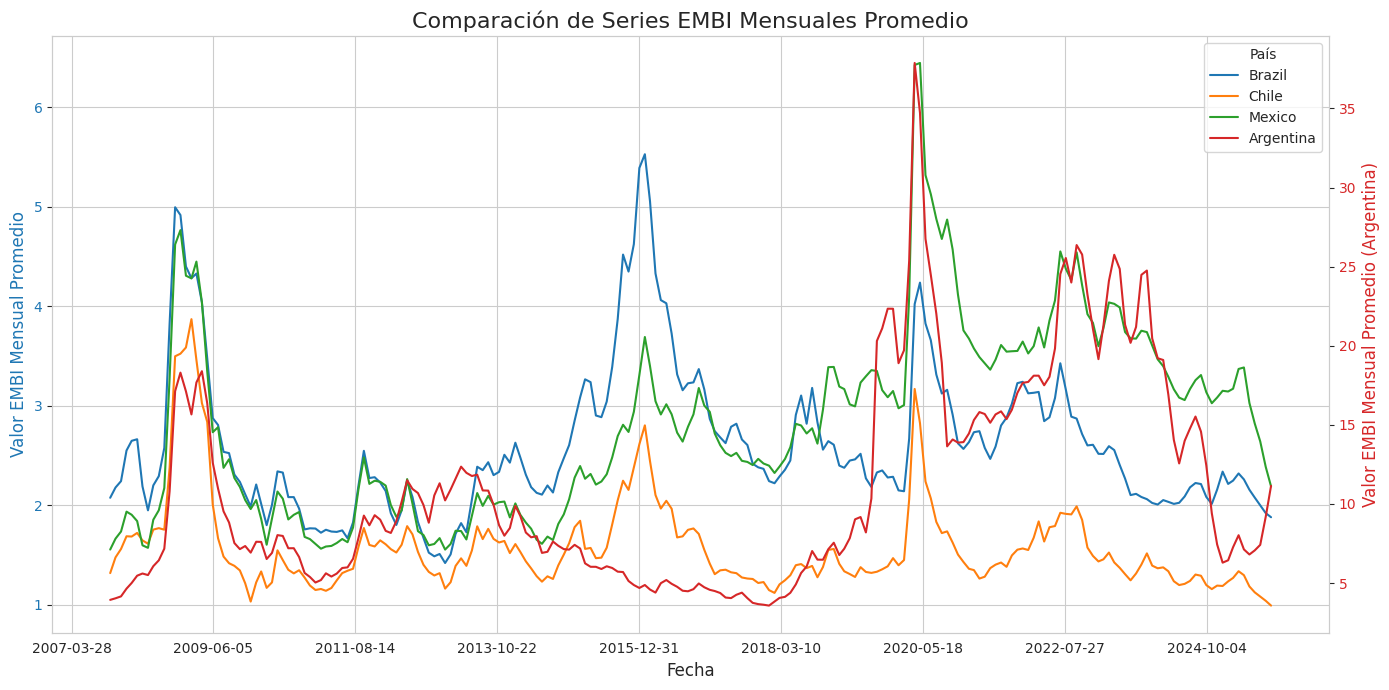

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Asegurarse de que el DataFrame embi_monthly_avg_df existe y no está vacío
if 'embi_monthly_avg_df' in locals() and not embi_monthly_avg_df.empty:

    print("📊 Generando gráfico de líneas para comparar las series EMBI mensuales promedio...")

    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Determine which columns to plot on the primary and secondary axes
    cols_to_plot = embi_monthly_avg_df.columns.tolist()
    argentina_col = 'EMBI_Argentina'

    if argentina_col in cols_to_plot:
        # Plot all columns except Argentina on the primary axis
        cols_on_ax1 = [col for col in cols_to_plot if col != argentina_col]
        for col in cols_on_ax1:
            ax1.plot(embi_monthly_avg_df.index, embi_monthly_avg_df[col], label=col.replace('EMBI_', '').replace('_Monthly_Avg', ''))

        ax1.set_ylabel('Valor EMBI Mensual Promedio', fontsize=12, color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Create a secondary y-axis for Argentina
        ax2 = ax1.twinx()
        ax2.plot(embi_monthly_avg_df.index, embi_monthly_avg_df[argentina_col], label=argentina_col.replace('EMBI_', '').replace('_Monthly_Avg', ''), color='tab:red')
        ax2.set_ylabel('Valor EMBI Mensual Promedio (Argentina)', fontsize=12, color='tab:red')
        ax2.tick_params(axis='y', labelcolor='tab:red')
        ax2.grid(False) # Avoid double grid

        # Combine legends from both axes
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, title='País', loc='upper right')

    else:
        # If Argentina is not present, plot all columns on the primary axis
        for col in cols_to_plot:
            ax1.plot(embi_monthly_avg_df.index, embi_monthly_avg_df[col], label=col.replace('EMBI_', '').replace('_Monthly_Avg', ''))

        ax1.set_ylabel('Valor EMBI Mensual Promedio', fontsize=12)
        ax1.legend(title='País', loc='upper right')


    ax1.set_xlabel('Fecha', fontsize=12)
    ax1.set_title('Comparación de Series EMBI Mensuales Promedio', fontsize=16)
    ax1.grid(True)


    # Formatear el eje x para mostrar fechas de manera legible
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) # Limitar el número de ticks principales
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x

    # Ajustar diseño para evitar solapamiento
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()
else:
    print("❌ El DataFrame 'embi_monthly_avg_df' no está disponible o está vacío.")
    print("Asegúrate de haber ejecutado la celda anterior para generar 'embi_monthly_avg_df'.")

### Producción/Actividad

#### Argentina - EMAE - df_emae_filtrado

In [21]:
import pandas as pd
import requests
from io import BytesIO
from datetime import datetime
import numpy as np

def descargar_y_limpiar_emae():
    """
    Descarga y limpia los datos del EMAE desde el sitio del INDEC
    Estructura conocida: encabezados en fila 3, años en columna A, meses en columna B
    """
    url = "https://www.indec.gob.ar/ftp/cuadros/economia/sh_emae_mensual_base2004.xls"

    try:
        print("Descargando datos del EMAE...")
        response = requests.get(url, timeout=30)
        response.raise_for_status()

        print("Procesando archivo Excel...")
        # Leer el archivo Excel sin encabezados
        excel_data = pd.read_excel(BytesIO(response.content), engine='xlrd', header=None)

        print(f"Dimensiones del archivo: {excel_data.shape}")

        # Los encabezados están en la fila 3 (índice 2)
        encabezados_row = 2
        print(f"\nEncabezados en fila {encabezados_row + 1}:")
        for col in range(min(8, len(excel_data.columns))):
            val = excel_data.iloc[encabezados_row, col]
            if pd.notna(val):
                print(f"  Columna {col}: {val}")

        # Procesar los datos desde la fila 6 (índice 5)
        datos_procesados = []

        # Mapeo de nombres de meses
        meses = {
            'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4,
            'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8,
            'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
        }

        print(f"\nProcesando datos desde la fila 6...")

        año_actual = None # Initialize year

        # Start from row 6 (index 5) as data starts from there
        for idx in range(5, len(excel_data)):
            row = excel_data.iloc[idx]

            # Columna A (índice 0): Año (may appear only on the first row of a year)
            # Columna B (índice 1): Mes
            año_val = row.iloc[0]
            mes_val = row.iloc[1]

            # Update current year if available
            if pd.notna(año_val):
                año_str = str(año_val).strip()
                if año_str.isdigit() and len(año_str) == 4:
                    año_actual = int(año_str)
                else:
                    año_actual = None # Reset if not a valid year format

            # Process only if we have a valid year and month
            if año_actual is not None and pd.notna(mes_val):
                mes_nombre = str(mes_val).strip().lower()
                if mes_nombre in meses:
                    mes_num = meses[mes_nombre]

                    # Filter from February 2004
                    if año_actual < 2004 or (año_actual == 2004 and mes_num < 2):
                        continue

                    # Format date as 'dd/mm/aaaa'
                    fecha = f"01/{mes_num:02d}/{año_actual}"

                    # Extraer las 6 columnas de datos (columnas C a H, índices 2 a 7)
                    valores = []
                    for col_idx in range(2, 8):  # Columnas C a H
                        try:
                            if col_idx < len(row):
                                val = row.iloc[col_idx]
                                if pd.notna(val):
                                    # Convertir a float, manejando diferentes formatos
                                    val_str = str(val).replace(',', '.')
                                    # Remover espacios y caracteres no numéricos (excepto punto, signo menos)
                                    val_clean = ''.join(c for c in val_str if c.isdigit() or c in '.-')
                                    if val_clean and val_clean.replace('.', '').replace('-', '').isdigit():
                                        valores.append(float(val_clean))
                                    else:
                                        valores.append(np.nan)
                                else:
                                    valores.append(np.nan)
                            else:
                                valores.append(np.nan)
                        except Exception as e:
                            print(f"Error procesando valor en fila {idx}, columna {col_idx}: {e}")
                            valores.append(np.nan)

                    # Crear registro
                    registro = {
                        'fecha': fecha,
                        'indice_serie_original': valores[0] if len(valores) > 0 else np.nan,
                        'var_respecto_año_anterior': valores[1] if len(valores) > 1 else np.nan,
                        'indice_desestacionalizado': valores[2] if len(valores) > 2 else np.nan,
                        'var_respecto_mes_anterior': valores[3] if len(valores) > 3 else np.nan,
                        'indice_tendencia_ciclo': valores[4] if len(valores) > 4 else np.nan,
                        'var_tendencia_mes_anterior': valores[5] if len(valores) > 5 else np.nan
                    }

                    datos_procesados.append(registro)

                    # Mostrar algunos registros para verification
                    if len(datos_procesados) <= 5 or len(datos_procesados) % 50 == 0:
                         print(f"  {fecha}: {año_actual}-{mes_nombre} -> {[round(v, 1) if not pd.isna(v) else 'NaN' for v in valores[:3]]}")


        # Crear DataFrame final
        if datos_procesados:
            df_limpio = pd.DataFrame(datos_procesados)

            # Convert 'fecha' to datetime for sorting
            df_limpio['fecha_sort'] = pd.to_datetime(df_limpio['fecha'], format='%d/%m/%Y')
            df_limpio = df_limpio.sort_values('fecha_sort')
            df_limpio = df_limpio.drop('fecha_sort', axis=1)

            # Resetear índice
            df_limpio = df_limpio.reset_index(drop=True)

            print(f"\nDataFrame creado exitosamente!")
            print(f"Número de registros: {len(df_limpio)}")
            print(f"Período: {df_limpio['fecha'].iloc[0]} a {df_limpio['fecha'].iloc[-1]}")

            # Verificar that we start from February 2004
            primera_fecha = pd.to_datetime(df_limpio['fecha'].iloc[0], format='%d/%m/%Y')
            if primera_fecha.year == 2004 and primera_fecha.month == 2:
                print("✓ Confirmado: Los datos comienzan en febrero de 2004")
            else:
                print(f"⚠️ Atención: Los datos comienzan en {primera_fecha.strftime('%B %Y')}")


            return df_limpio
        else:
            print("No se pudieron procesar los datos")
            return None

    except Exception as e:
        print(f"Error al descargar o procesar los datos: {e}")
        import traceback
        traceback.print_exc()
        return None

def mostrar_info_dataframe(df):
    """
    Muestra información detallada del DataFrame
    """
    if df is not None:
        print("\n" + "="*60)
        print("INFORMACIÓN DEL DATAFRAME")
        print("="*60)
        print(f"Shape: {df.shape}")
        print(f"\nColumnas:")
        for col in df.columns:
            print(f"  - {col}")

        print(f"\nPrimeras 5 filas:")
        print(df.head())

        print(f"\nÚltimas 5 filas:")
        print(df.tail())

        print(f"\nInformación de tipos de datos:")
        print(df.info())

        print(f"\nEstadísticas descriptivas:")
        print(df.describe())

# Ejecutar el proceso
if __name__ == "__main__":
    # Descargar y limpiar los datos
    df_emae = descargar_y_limpiar_emae()

    if df_emae is not None:
        # Mostrar información del DataFrame
        mostrar_info_dataframe(df_emae)

        # Guardar como CSV
        nombre_archivo = f"emae_datos_limpios_{datetime.now().strftime('%Y%m%d')}.csv"
        df_emae.to_csv(nombre_archivo, index=False, encoding='utf-8')
        print(f"\nArchivo guardado como: {nombre_archivo}")

        # Guardar como Excel
        nombre_archivo_excel = f"emae_datos_limpios_{datetime.now().strftime('%Y%m%d')}.xlsx"
        df_emae.to_excel(nombre_archivo_excel, index=False)
        print(f"Archivo guardado como: {nombre_archivo_excel}")
    else:
        print("No se pudo crear el DataFrame")

Descargando datos del EMAE...
Procesando archivo Excel...
Dimensiones del archivo: (266, 8)

Encabezados en fila 3:
  Columna 0: Período
  Columna 2: Índice Serie Original
2004=100
  Columna 3: Var % respecto a igual período del año anterior
  Columna 4: Índice Serie Desestacionalizada
2004=100
  Columna 5: Var % respecto al mes anterior
  Columna 6: Índice Serie tendencia-ciclo
2004=100
  Columna 7: Var % respecto al mes anterior

Procesando datos desde la fila 6...
  01/02/2004: 2004-febrero -> [90.2, 0.0, 98.2]
  01/03/2004: 2004-marzo -> [101.9, 0.0, 97.8]
  01/04/2004: 2004-abril -> [102.6, 0.0, 95.2]
  01/05/2004: 2004-mayo -> [109.9, 0.0, 96.9]
  01/06/2004: 2004-junio -> [105.7, 0.0, 98.6]
  01/03/2008: 2008-marzo -> [132.3, 2.4, 133.3]
  01/05/2012: 2012-mayo -> [157.4, -5.3, 140.2]
  01/07/2016: 2016-julio -> [143.7, -5.3, 144.4]
  01/09/2020: 2020-septiembre -> [127.2, -5.7, 130.7]
  01/11/2024: 2024-noviembre -> [148.1, 1.2, 150.6]

DataFrame creado exitosamente!
Número de 

In [23]:
# Transformar df_emae para mostrar solo las columnas 'fecha' y 'indice_desestacionalizado'
df_emae_filtrado = df_emae[['fecha', 'indice_desestacionalizado']]

# Mostrar el DataFrame filtrado
display(df_emae_filtrado)

,fecha,indice_desestacionalizado
0,01/02/2004,98.178161
1,01/03/2004,97.770897
2,01/04/2004,95.158417
3,01/05/2004,96.874530
4,01/06/2004,98.638163
...,...,...
254,01/04/2025,152.385915
255,01/05/2025,152.058851
256,01/06/2025,151.127008
257,01/07/2025,151.031014


#### Chile - IMACEC - imacec_filtered

In [26]:
"""
PROCESADOR IMACEC CHILE - DESDE EXCEL
Lee datos de IMACEC desestacionalizado desde archivo Excel descargado
Tabla: Fecha (columna A) e IMACEC (columna B), comenzando en fila 15
"""

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def load_imacec_from_excel(file_path):
    """
    Cargar IMACEC desestacionalizado desde Excel del Banco Central de Chile

    Estructura del Excel:
    - Fila 15 (A15:B15): Comienza datos
    - Columna A: Fecha
    - Columna B: IMACEC (Total desestacionalizado)

    Parameters:
    -----------
    file_path : str
        Ruta del archivo Excel

    Returns:
    --------
    pandas.DataFrame
        DataFrame con IMACEC procesado
    """

    print("📊 PROCESANDO IMACEC CHILE - DESDE EXCEL")
    print("="*50)
    print(f"📁 Archivo: {file_path}")

    try:
        # Leer Excel saltando las primeras 14 filas (datos comienzan en fila 15)
        df = pd.read_excel(file_path, skiprows=14)

        print(f"✅ Archivo cargado: {df.shape[0]} filas × {df.shape[1]} columnas")
        print(f"📋 Columnas detectadas: {list(df.columns)}")

        # Crear DataFrame limpio
        imacec_df = pd.DataFrame()

        # Columna A: Fecha (primera columna, índice 0)
        print("\n📅 Procesando fechas...")
        fecha_col = df.iloc[:, 0]  # Primera columna
        imacec_df['Date'] = pd.to_datetime(fecha_col, errors='coerce')

        # Eliminar filas sin fecha válida
        initial_rows = len(imacec_df)
        imacec_df = imacec_df.dropna(subset=['Date'])
        removed_rows = initial_rows - len(imacec_df)

        print(f"   ✅ {len(imacec_df)} fechas válidas encontradas")
        if removed_rows > 0:
            print(f"   ⚠️ {removed_rows} filas sin fecha válida eliminadas")
        print(f"   📅 Rango: {imacec_df['Date'].min()} a {imacec_df['Date'].max()}")

        # Columna B: IMACEC (índice 1)
        print("\n📊 Procesando IMACEC...")
        if df.shape[1] > 1:
            imacec_values = pd.to_numeric(df.iloc[:len(imacec_df), 1], errors='coerce')
            imacec_df['IMACEC'] = imacec_values.values

            valid_imacec = imacec_df['IMACEC'].notna().sum()
            print(f"   ✅ {valid_imacec} valores válidos de IMACEC")

            # Estadísticas básicas
            stats = imacec_df['IMACEC'].describe()
            print(f"   📈 Media: {stats['mean']:.2f}")
            print(f"   📈 Mínimo: {stats['min']:.2f}")
            print(f"   📈 Máximo: {stats['max']:.2f}")
            print(f"   📈 Desv. Std: {stats['std']:.2f}")
        else:
            print("   ❌ Columna B (IMACEC) no encontrada")
            return None

        # Establecer fecha como índice
        imacec_df = imacec_df.set_index('Date')

        # Verificar datos faltantes
        missing = imacec_df['IMACEC'].isna().sum()
        if missing > 0:
            print(f"\n⚠️ DATOS FALTANTES:")
            print(f"   {missing} observaciones con valores faltantes")
            pct_missing = (missing / len(imacec_df)) * 100
            print(f"   {pct_missing:.1f}% del total")
        else:
            print(f"\n✅ Sin datos faltantes")

        # Resumen final
        print(f"\n📊 RESUMEN DE DATOS CARGADOS:")
        print(f"   Total observaciones: {len(imacec_df)}")
        print(f"   Período completo: {imacec_df.index.min()} a {imacec_df.index.max()}")

        # Detectar frecuencia
        freq_diff = imacec_df.index.to_series().diff().mode()
        if len(freq_diff) > 0:
            days = freq_diff[0].days
            if days >= 28 and days <= 31:
                freq = "Mensual"
            elif days >= 89 and days <= 92:
                freq = "Trimestral"
            else:
                freq = f"Cada {days} días"
            print(f"   Frecuencia detectada: {freq}")

        return imacec_df

    except Exception as e:
        print(f"❌ Error procesando Excel: {e}")
        import traceback
        traceback.print_exc()
        return None

def calculate_growth_rates(df, column='IMACEC'):
    """
    Calcular tasas de crecimiento del IMACEC
    """

    print("\n📊 CALCULANDO TASAS DE CRECIMIENTO")
    print("="*50)

    if df is None or df.empty:
        print("❌ No hay datos para procesar")
        return None

    df_rates = df.copy()

    # Crecimiento mensual (%)
    df_rates['IMACEC_growth_mom'] = df[column].pct_change() * 100
    valid_mom = df_rates['IMACEC_growth_mom'].notna().sum()
    print(f"   ✅ Crecimiento mensual (MoM): {valid_mom} observaciones")

    # Crecimiento anual - 12 períodos (%)
    df_rates['IMACEC_growth_yoy'] = df[column].pct_change(12) * 100
    valid_yoy = df_rates['IMACEC_growth_yoy'].notna().sum()
    print(f"   ✅ Crecimiento anual (YoY): {valid_yoy} observaciones")

    # Índice en logaritmos (para análisis econométrico)
    df_rates['IMACEC_log'] = np.log(df[column].replace(0, np.nan))
    valid_log = df_rates['IMACEC_log'].notna().sum()
    print(f"   ✅ IMACEC en logaritmos: {valid_log} observaciones")

    # Estadísticas de crecimiento
    print(f"\n📈 ESTADÍSTICAS DE CRECIMIENTO:")

    # MoM
    growth_mom = df_rates['IMACEC_growth_mom'].dropna()
    if len(growth_mom) > 0:
        print(f"   Crecimiento MoM:")
        print(f"      Promedio: {growth_mom.mean():.2f}%")
        print(f"      Desv. Std: {growth_mom.std():.2f}%")

    # YoY
    growth_yoy = df_rates['IMACEC_growth_yoy'].dropna()
    if len(growth_yoy) > 0:
        print(f"   Crecimiento YoY:")
        print(f"      Promedio: {growth_yoy.mean():.2f}%")
        print(f"      Desv. Std: {growth_yoy.std():.2f}%")
        print(f"      Mínimo: {growth_yoy.min():.2f}%")
        print(f"      Máximo: {growth_yoy.max():.2f}%")

    return df_rates

def export_imacec(df, filename='imacec_chile.csv'):
    """
    Exportar datos IMACEC a CSV
    """

    print(f"\n💾 EXPORTANDO DATOS")
    print("="*50)

    if df is None or df.empty:
        print("❌ No hay datos para exportar")
        return False

    df.to_csv(filename)

    print(f"   ✅ Archivo exportado: {filename}")
    print(f"   📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"   📋 Columnas incluidas:")
    for col in df.columns:
        print(f"      - {col}")

    return True

def main(file_path):
    """
    Función principal para procesar IMACEC desde Excel

    Parameters:
    -----------
    file_path : str
        Ruta del archivo Excel de IMACEC
    """

    print("🚀 PROCESAMIENTO COMPLETO IMACEC CHILE")
    print("="*60)

    # PASO 1: Cargar datos del Excel
    imacec_df = load_imacec_from_excel(file_path)

    if imacec_df is None or imacec_df.empty:
        print("\n❌ No se pudieron cargar los datos")
        return None

    # PASO 2: Calcular tasas de crecimiento
    imacec_complete = calculate_growth_rates(imacec_df)

    # PASO 3: Exportar
    export_imacec(imacec_complete)

    # PASO 4: Mostrar muestra de resultados
    print("\n📋 MUESTRA DE DATOS FINALES:")
    print("="*60)
    print("Primeras 10 observaciones:")
    print(imacec_complete.head(10).round(2))
    print("\nÚltimas 5 observaciones:")
    print(imacec_complete.tail(5).round(2))

    print("\n🎉 ¡PROCESAMIENTO COMPLETADO EXITOSAMENTE!")
    print("📊 Variables disponibles:")
    print("   - IMACEC: Índice desestacionalizado (base 2018=100)")
    print("   - IMACEC_growth_mom: Crecimiento mensual (%)")
    print("   - IMACEC_growth_yoy: Crecimiento anual (%)")
    print("   - IMACEC_log: Logaritmo del índice")
    print(f"📅 Período completo: {imacec_complete.index.min()} a {imacec_complete.index.max()}")
    print("📁 Archivo: imacec_chile.csv")

    return imacec_complete

# Ejecutar
if __name__ == "__main__":
    print("📂 INSTRUCCIONES:")
    print("="*60)
    print("1. Descarga el Excel de IMACEC desde Banco Central de Chile")
    print("2. Sube el archivo a Colab")
    print("3. Ejecuta: main('nombre_archivo.xlsx')")
    print("="*60)

    # Detectar archivos Excel disponibles
    import os
    excel_files = [f for f in os.listdir('.') if f.endswith(('.xlsx', '.xls'))]

    if excel_files:
        print(f"\n📁 Archivos Excel encontrados:")
        for i, file in enumerate(excel_files):
            print(f"   {i}: {file}")

        print("\n💡 Para procesar el archivo, ejecuta:")
        print(f"   resultado = main('{excel_files[0]}')")
    else:
        print("\n⚠️ No se encontraron archivos Excel")
        print("   Sube tu archivo usando el panel izquierdo de Colab")

    # Ejemplo de uso:
    imacec_data = main('CCNN2018_IMACEC_03_A (1).xlsx')

📂 INSTRUCCIONES:
1. Descarga el Excel de IMACEC desde Banco Central de Chile
2. Sube el archivo a Colab
3. Ejecuta: main('nombre_archivo.xlsx')

📁 Archivos Excel encontrados:
   0: CCNN2018_IMACEC_03_A (1).xlsx
   1: emae_datos_limpios_20251025.xlsx
   2: macro_data_cleaned.xlsx

💡 Para procesar el archivo, ejecuta:
   resultado = main('CCNN2018_IMACEC_03_A (1).xlsx')
🚀 PROCESAMIENTO COMPLETO IMACEC CHILE
📊 PROCESANDO IMACEC CHILE - DESDE EXCEL
📁 Archivo: CCNN2018_IMACEC_03_A (1).xlsx
✅ Archivo cargado: 356 filas × 11 columnas
📋 Columnas detectadas: ['Periodo', '1. Imacec', '2. Producción de bienes', '2.1. Minería', '2.2. Industria', '2.3. Resto de bienes', '3. Comercio', '4. Servicios', '5. Imacec a costo de factores', '6. Impuestos sobre los productos', '7. Imacec no minero']

📅 Procesando fechas...
   ✅ 356 fechas válidas encontradas
   📅 Rango: 1996-01-01 00:00:00 a 2025-08-01 00:00:00

📊 Procesando IMACEC...
   ✅ 356 valores válidos de IMACEC
   📈 Media: 78.07
   📈 Mínimo: 42.01
 

In [31]:
# Asegurarse de que el DataFrame imacec_data existe y no está vacío
if 'imacec_data' in locals() and not imacec_data.empty:
    print("Transformando imacec_data: seleccionando 'IMACEC'...")

    # Crear un nuevo DataFrame con solo el índice (Date) y la columna 'IMACEC'
    # Dado que Date ya es el índice, simplemente seleccionamos la columna 'IMACEC'
    imacec_filtered = imacec_data[['IMACEC']]

    print("✅ Transformación completada.")
    print(f"Shape del DataFrame filtrado: {imacec_filtered.shape}")

    # Mostrar el DataFrame filtrado
    print("\n📋 DataFrame 'imacec_filtered':")
    display(imacec_filtered.head())
    display(imacec_filtered.tail())

else:
    print("❌ El DataFrame 'imacec_data' no está disponible o está vacío.")
    print("Asegúrate de haber ejecutado la celda que genera 'imacec_data'.")

Transformando imacec_data: seleccionando 'IMACEC'...
✅ Transformación completada.
Shape del DataFrame filtrado: (356, 1)

📋 DataFrame 'imacec_filtered':


,IMACEC
Date,
1996-01-01,42.005682
1996-02-01,42.511959
1996-03-01,42.509977
1996-04-01,42.552100
1996-05-01,42.644227


,IMACEC
Date,
2025-04-01,113.703278
2025-05-01,113.197106
2025-06-01,112.528294
2025-07-01,113.562674
2025-08-01,112.807635


#### Brasil - IBC-Br - ibc_br_filtered

In [32]:
"""
PROCESADOR IBC-Br BRASIL - DESDE EXCEL
Lee datos de IBC-Br (Índice de Actividad Económica) desde archivo Excel
Tabla: Periodo (columna A) e IBC-Br (columna H), comenzando en fila 11
"""

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def load_ibc_br_from_excel(file_path):
    """
    Cargar IBC-Br desde Excel del Banco Central do Brasil

    Estructura del Excel:
    - Fila 11 (A11:H11): Comienza datos
    - Columna A: Periodo (fecha)
    - Columna H: IBC-Br (Índice de Actividad Económica)

    Parameters:
    -----------
    file_path : str
        Ruta del archivo Excel

    Returns:
    --------
    pandas.DataFrame
        DataFrame con IBC-Br procesado
    """

    print("📊 PROCESANDO IBC-Br BRASIL - DESDE EXCEL")
    print("="*50)
    print(f"📁 Archivo: {file_path}")

    try:
        # Leer Excel saltando las primeras 10 filas (datos comienzan en fila 11)
        df = pd.read_excel(file_path, skiprows=10)

        print(f"✅ Archivo cargado: {df.shape[0]} filas × {df.shape[1]} columnas")
        print(f"📋 Columnas detectadas: {list(df.columns)}")

        # Crear DataFrame limpio
        ibc_df = pd.DataFrame()

        # Columna A: Periodo/Fecha (primera columna, índice 0)
        print("\n📅 Procesando fechas...")
        periodo_col = df.iloc[:, 0]  # Primera columna
        ibc_df['Date'] = pd.to_datetime(periodo_col, errors='coerce')

        # Eliminar filas sin fecha válida
        initial_rows = len(ibc_df)
        ibc_df = ibc_df.dropna(subset=['Date'])
        removed_rows = initial_rows - len(ibc_df)

        print(f"   ✅ {len(ibc_df)} fechas válidas encontradas")
        if removed_rows > 0:
            print(f"   ⚠️ {removed_rows} filas sin fecha válida eliminadas")
        print(f"   📅 Rango: {ibc_df['Date'].min()} a {ibc_df['Date'].max()}")

        # Columna H: IBC-Br (índice 7, porque A=0, B=1, C=2, D=3, E=4, F=5, G=6, H=7)
        print("\n📊 Procesando IBC-Br...")
        if df.shape[1] > 7:
            ibc_values = pd.to_numeric(df.iloc[:len(ibc_df), 7], errors='coerce')
            ibc_df['IBC_Br'] = ibc_values.values

            valid_ibc = ibc_df['IBC_Br'].notna().sum()
            print(f"   ✅ {valid_ibc} valores válidos de IBC-Br")

            # Estadísticas básicas
            stats = ibc_df['IBC_Br'].describe()
            print(f"   📈 Media: {stats['mean']:.2f}")
            print(f"   📈 Mínimo: {stats['min']:.2f}")
            print(f"   📈 Máximo: {stats['max']:.2f}")
            print(f"   📈 Desv. Std: {stats['std']:.2f}")
        else:
            print(f"   ❌ Columna H (IBC-Br) no encontrada")
            print(f"   ⚠️ El archivo solo tiene {df.shape[1]} columnas")
            return None

        # Establecer fecha como índice
        ibc_df = ibc_df.set_index('Date')

        # Verificar datos faltantes
        missing = ibc_df['IBC_Br'].isna().sum()
        if missing > 0:
            print(f"\n⚠️ DATOS FALTANTES:")
            print(f"   {missing} observaciones con valores faltantes")
            pct_missing = (missing / len(ibc_df)) * 100
            print(f"   {pct_missing:.1f}% del total")
        else:
            print(f"\n✅ Sin datos faltantes")

        # Resumen final
        print(f"\n📊 RESUMEN DE DATOS CARGADOS:")
        print(f"   Total observaciones: {len(ibc_df)}")
        print(f"   Período completo: {ibc_df.index.min()} a {ibc_df.index.max()}")

        # Detectar frecuencia
        freq_diff = ibc_df.index.to_series().diff().mode()
        if len(freq_diff) > 0:
            days = freq_diff[0].days
            if days >= 28 and days <= 31:
                freq = "Mensual"
            elif days >= 89 and days <= 92:
                freq = "Trimestral"
            else:
                freq = f"Cada {days} días"
            print(f"   Frecuencia detectada: {freq}")

        return ibc_df

    except Exception as e:
        print(f"❌ Error procesando Excel: {e}")
        import traceback
        traceback.print_exc()
        return None

def calculate_growth_rates(df, column='IBC_Br'):
    """
    Calcular tasas de crecimiento del IBC-Br
    """

    print("\n📊 CALCULANDO TASAS DE CRECIMIENTO")
    print("="*50)

    if df is None or df.empty:
        print("❌ No hay datos para procesar")
        return None

    df_rates = df.copy()

    # Crecimiento mensual (%)
    df_rates['IBC_Br_growth_mom'] = df[column].pct_change() * 100
    valid_mom = df_rates['IBC_Br_growth_mom'].notna().sum()
    print(f"   ✅ Crecimiento mensual (MoM): {valid_mom} observaciones")

    # Crecimiento anual - 12 períodos (%)
    df_rates['IBC_Br_growth_yoy'] = df[column].pct_change(12) * 100
    valid_yoy = df_rates['IBC_Br_growth_yoy'].notna().sum()
    print(f"   ✅ Crecimiento anual (YoY): {valid_yoy} observaciones")

    # Índice en logaritmos (para análisis econométrico)
    df_rates['IBC_Br_log'] = np.log(df[column].replace(0, np.nan))
    valid_log = df_rates['IBC_Br_log'].notna().sum()
    print(f"   ✅ IBC-Br en logaritmos: {valid_log} observaciones")

    # Estadísticas de crecimiento
    print(f"\n📈 ESTADÍSTICAS DE CRECIMIENTO:")

    # MoM
    growth_mom = df_rates['IBC_Br_growth_mom'].dropna()
    if len(growth_mom) > 0:
        print(f"   Crecimiento MoM:")
        print(f"      Promedio: {growth_mom.mean():.2f}%")
        print(f"      Desv. Std: {growth_mom.std():.2f}%")

    # YoY
    growth_yoy = df_rates['IBC_Br_growth_yoy'].dropna()
    if len(growth_yoy) > 0:
        print(f"   Crecimiento YoY:")
        print(f"      Promedio: {growth_yoy.mean():.2f}%")
        print(f"      Desv. Std: {growth_yoy.std():.2f}%")
        print(f"      Mínimo: {growth_yoy.min():.2f}%")
        print(f"      Máximo: {growth_yoy.max():.2f}%")

    return df_rates

def export_ibc_br(df, filename='ibc_br_brasil.csv'):
    """
    Exportar datos IBC-Br a CSV
    """

    print(f"\n💾 EXPORTANDO DATOS")
    print("="*50)

    if df is None or df.empty:
        print("❌ No hay datos para exportar")
        return False

    df.to_csv(filename)

    print(f"   ✅ Archivo exportado: {filename}")
    print(f"   📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"   📋 Columnas incluidas:")
    for col in df.columns:
        print(f"      - {col}")

    return True

def main(file_path):
    """
    Función principal para procesar IBC-Br desde Excel

    Parameters:
    -----------
    file_path : str
        Ruta del archivo Excel de IBC-Br
    """

    print("🚀 PROCESAMIENTO COMPLETO IBC-Br BRASIL")
    print("="*60)

    # PASO 1: Cargar datos del Excel
    ibc_df = load_ibc_br_from_excel(file_path)

    if ibc_df is None or ibc_df.empty:
        print("\n❌ No se pudieron cargar los datos")
        return None

    # PASO 2: Calcular tasas de crecimiento
    ibc_complete = calculate_growth_rates(ibc_df)

    # PASO 3: Exportar
    export_ibc_br(ibc_complete)

    # PASO 4: Mostrar muestra de resultados
    print("\n📋 MUESTRA DE DATOS FINALES:")
    print("="*60)
    print("Primeras 10 observaciones:")
    print(ibc_complete.head(10).round(2))
    print("\nÚltimas 5 observaciones:")
    print(ibc_complete.tail(5).round(2))

    print("\n🎉 ¡PROCESAMIENTO COMPLETADO EXITOSAMENTE!")
    print("📊 Variables disponibles:")
    print("   - IBC_Br: Índice de Actividad Económica (base 2002=100)")
    print("   - IBC_Br_growth_mom: Crecimiento mensual (%)")
    print("   - IBC_Br_growth_yoy: Crecimiento anual (%)")
    print("   - IBC_Br_log: Logaritmo del índice")
    print(f"📅 Período completo: {ibc_complete.index.min()} a {ibc_complete.index.max()}")
    print("📁 Archivo: ibc_br_brasil.csv")

    return ibc_complete

# Ejecutar
if __name__ == "__main__":
    print("📂 INSTRUCCIONES:")
    print("="*60)
    print("1. Descarga el Excel de IBC-Br desde Banco Central do Brasil")
    print("2. Sube el archivo a Colab")
    print("3. Ejecuta: main('nombre_archivo.xlsx')")
    print("="*60)

    # Detectar archivos Excel disponibles
    import os
    excel_files = [f for f in os.listdir('.') if f.endswith(('.xlsx', '.xls'))]

    if excel_files:
        print(f"\n📁 Archivos Excel encontrados:")
        for i, file in enumerate(excel_files):
            print(f"   {i}: {file}")

        print("\n💡 Para procesar el archivo, ejecuta:")
        print(f"   resultado = main('{excel_files[0]}')")
    else:
        print("\n⚠️ No se encontraron archivos Excel")
        print("   Sube tu archivo usando el panel izquierdo de Colab")

    # Ejemplo de uso:
    ibc_br_data = main('ies-01.xlsx')

📂 INSTRUCCIONES:
1. Descarga el Excel de IBC-Br desde Banco Central do Brasil
2. Sube el archivo a Colab
3. Ejecuta: main('nombre_archivo.xlsx')

📁 Archivos Excel encontrados:
   0: ies-01.xlsx
   1: CCNN2018_IMACEC_03_A (1).xlsx
   2: emae_datos_limpios_20251025.xlsx
   3: macro_data_cleaned.xlsx

💡 Para procesar el archivo, ejecuta:
   resultado = main('ies-01.xlsx')
🚀 PROCESAMIENTO COMPLETO IBC-Br BRASIL
📊 PROCESANDO IBC-Br BRASIL - DESDE EXCEL
📁 Archivo: ies-01.xlsx
✅ Archivo cargado: 291 filas × 13 columnas
📋 Columnas detectadas: [datetime.datetime(2003, 1, 1, 0, 0), 67.4926, 41.73349, 86.72847, 65.23963, 62.27014, 69.1237, 70.54094, 54.82835, 91.63182, 66.74433, 65.56767, 71.47313]

📅 Procesando fechas...
   ✅ 271 fechas válidas encontradas
   ⚠️ 20 filas sin fecha válida eliminadas
   📅 Rango: 2003-02-01 00:00:00 a 2025-08-01 00:00:00

📊 Procesando IBC-Br...
   ✅ 271 valores válidos de IBC-Br
   📈 Media: 93.87
   📈 Mínimo: 69.44
   📈 Máximo: 110.25
   📈 Desv. Std: 9.68

✅ Sin da

In [33]:
# Asegurarse de que el DataFrame ibc_br_data existe y no está vacío
if 'ibc_br_data' in locals() and not ibc_br_data.empty:
    print("Transformando ibc_br_data: seleccionando 'IBC_Br'...")

    # Crear un nuevo DataFrame con solo el índice (Date) y la columna 'IBC_Br'
    # Dado que Date ya es el índice, simplemente seleccionamos la columna 'IBC_Br'
    ibc_br_filtered = ibc_br_data[['IBC_Br']]

    print("✅ Transformación completada.")
    print(f"Shape del DataFrame filtrado: {ibc_br_filtered.shape}")

    # Mostrar el DataFrame filtrado
    print("\n📋 DataFrame 'ibc_br_filtered':")
    display(ibc_br_filtered.head())
    display(ibc_br_filtered.tail())

else:
    print("❌ El DataFrame 'ibc_br_data' no está disponible o está vacío.")
    print("Asegúrate de haber ejecutado la celda que genera 'ibc_br_data'.")

Transformando ibc_br_data: seleccionando 'IBC_Br'...
✅ Transformación completada.
Shape del DataFrame filtrado: (271, 1)

📋 DataFrame 'ibc_br_filtered':


,IBC_Br
Date,
2003-02-01,71.71683
2003-03-01,71.36081
2003-04-01,70.87224
2003-05-01,70.16436
2003-06-01,70.30501


,IBC_Br
Date,
2025-04-01,110.25274
2025-05-01,109.00458
2025-06-01,108.79272
2025-07-01,108.22321
2025-08-01,108.65847


#### Mexico - IGAE - igae_filtered

In [41]:
"""
PROCESADOR IGAE MÉXICO - DESDE EXCEL
Lee datos de IGAE (Indicador Global de la Actividad Económica) desde un archivo Excel.

Estructura del Excel (Formato Horizontal):
- Fila 5 (índice 4): Año (p.ej., 2020, 2020, 2020...)
- Fila 6 (índice 5): Mes (p.ej., Enero, Febrero, Marzo...)
- Fila 7 (índice 6): Indicador IGAE
- Los datos comienzan en la columna 'C' (índice 2).
"""

import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

def cargar_igae_mexico_excel(file_path, nombre_hoja=0):
    """
    Cargar IGAE desde Excel (formato horizontal de INEGI).

    Parameters:
    -----------
    file_path : str
        Ruta del archivo Excel
    nombre_hoja : str or int, optional
        Nombre o índice de la hoja. Default es 0.

    Returns:
    --------
    pandas.DataFrame
        DataFrame con IGAE procesado, o None si falla.
    """

    print("📊 PROCESANDO IGAE MÉXICO - DESDE EXCEL")
    print("="*50)
    print(f"📁 Archivo: {file_path}")

    # 1. Verificación de seguridad: ¿Existe el archivo?
    if not os.path.exists(file_path):
        print(f"Error: El archivo no se encontró en la ruta especificada:")
        print(f"{os.path.abspath(file_path)}")
        return None

    try:
        # 2. Leer el archivo Excel
        # Usamos 'header=None' porque leemos filas específicas
        df_completo = pd.read_excel(file_path, sheet_name=nombre_hoja, header=None)

        print(f"✅ Archivo cargado: {df_completo.shape[0]} filas × {df_completo.shape[1]} columnas")

        # 3. Definir la columna de inicio
        columna_inicio = 2 # Columna 'C'

        # 4. Extraer los datos de las filas específicas
        print("🔄 Extrayendo datos de formato horizontal...")
        datos_anio = df_completo.iloc[4, columna_inicio:]
        datos_mes = df_completo.iloc[5, columna_inicio:]
        datos_indicador = df_completo.iloc[6, columna_inicio:]

        # 5. Crear un DataFrame (tabla) con estos datos
        df_resultado = pd.DataFrame({
            'Año_Raw': datos_anio,
            'Mes_Raw': datos_mes,
            'IGAE': datos_indicador
        })

        # 6. Limpieza de datos
        print("🧹 Limpiando y transformando datos...")

        # Rellenar valores nulos en 'Año' (ffill = forward fill)
        df_resultado['Año'] = df_resultado['Año_Raw'].fillna(method='ffill')

        # Copiar Mes (no necesita ffill)
        df_resultado['Mes'] = df_resultado['Mes_Raw']

        # Eliminar columnas vacías al final (si 'IGAE' está vacío)
        initial_rows = len(df_resultado)
        df_resultado = df_resultado.dropna(subset=['IGAE'])
        removed_rows = initial_rows - len(df_resultado)
        print(f"   ✅ {len(df_resultado)} observaciones de IGAE encontradas")
        if removed_rows > 0:
            print(f"   ⚠️ {removed_rows} columnas vacías eliminadas")

        # Asegurar tipos de datos
        df_resultado['Año'] = df_resultado['Año'].astype(int)
        df_resultado['IGAE'] = pd.to_numeric(df_resultado['IGAE'])

        # 7. Procesamiento de Fechas (Inspirado en script de Brasil)
        print("\n📅 Procesando fechas...")

        # Mapeo de meses (robusto para texto o número)
        mapeo_meses = {
            'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
            'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12,
            'Ene': 1, 'Feb': 2, 'Mar': 3, 'Abr': 4, 'May': 5, 'Jun': 6,
            'Jul': 7, 'Ago': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dic': 12
        }

        # Intentar convertir mes a número (si ya es 1, 2, 3)
        df_resultado['Mes_Num'] = pd.to_numeric(df_resultado['Mes'], errors='coerce')

        # Si falló (es texto), usar el mapeo
        if df_resultado['Mes_Num'].isna().any():
            # Normalizar (ej: "enero" -> "Enero")
            mes_str_normalizado = df_resultado['Mes'].astype(str).str.capitalize()
            df_resultado['Mes_Num'] = mes_str_normalizado.map(mapeo_meses)

        # Comprobar si faltan meses después del mapeo
        if df_resultado['Mes_Num'].isna().any():
            print(f"   ⚠️ Advertencia: No se pudieron mapear todos los meses.")
            print(f"      Ejemplos no mapeados: {df_resultado[df_resultado['Mes_Num'].isna()]['Mes'].unique()}")

        # Crear la columna de Fecha (primer día del mes)
        df_resultado['Date'] = pd.to_datetime(
            df_resultado['Año'].astype(str) + '-' + df_resultado['Mes_Num'].astype(str) + '-01',
            errors='coerce'
        )

        # Eliminar filas sin fecha válida
        df_resultado = df_resultado.dropna(subset=['Date'])
        print(f"   ✅ {len(df_resultado)} fechas válidas creadas")
        print(f"   📅 Rango: {df_resultado['Date'].min().date()} a {df_resultado['Date'].max().date()}")

        # 8. Limpieza final
        # Seleccionar columnas y establecer índice
        df_final = df_resultado[['Date', 'IGAE']].set_index('Date')

        # Estadísticas básicas
        stats = df_final['IGAE'].describe()
        print(f"\n📈 ESTADÍSTICAS IGAE:")
        print(f"   📈 Media: {stats['mean']:.2f}")
        print(f"   📈 Mínimo: {stats['min']:.2f}")
        print(f"   📈 Máximo: {stats['max']:.2f}")
        print(f"   📈 Desv. Std: {stats['std']:.2f}")

        return df_final

    except ImportError:
        print("Error: Necesitas instalar la librería 'openpyxl' para leer archivos .xlsx")
        print("Ejecuta este comando: pip install openpyxl")
        return None
    except Exception as e:
        print(f"❌ Error procesando Excel: {e}")
        import traceback
        traceback.print_exc()
        return None

def calcular_tasas_crecimiento(df, column='IGAE'):
    """
    Calcular tasas de crecimiento del IGAE.
    Copiado de la estructura del script de Brasil.
    """

    print("\n📊 CALCULANDO TASAS DE CRECIMIENTO")
    print("="*50)

    if df is None or df.empty:
        print("❌ No hay datos para procesar")
        return None

    df_rates = df.copy()

    # Crecimiento mensual (%)
    df_rates['IGAE_growth_mom'] = df[column].pct_change() * 100
    valid_mom = df_rates['IGAE_growth_mom'].notna().sum()
    print(f"   ✅ Crecimiento mensual (MoM): {valid_mom} observaciones")

    # Crecimiento anual - 12 períodos (%)
    df_rates['IGAE_growth_yoy'] = df[column].pct_change(12) * 100
    valid_yoy = df_rates['IGAE_growth_yoy'].notna().sum()
    print(f"   ✅ Crecimiento anual (YoY): {valid_yoy} observaciones")

    # Índice en logaritmos
    df_rates['IGAE_log'] = np.log(df[column].replace(0, np.nan))
    valid_log = df_rates['IGAE_log'].notna().sum()
    print(f"   ✅ IGAE en logaritmos: {valid_log} observaciones")

    return df_rates

def exportar_datos(df, filename='igae_mexico_procesado.csv'):
    """
    Exportar datos IGAE a CSV.
    """

    print(f"\n💾 EXPORTANDO DATOS")
    print("="*50)

    if df is None or df.empty:
        print("❌ No hay datos para exportar")
        return False

    df.to_csv(filename)

    print(f"   ✅ Archivo exportado: {filename}")
    print(f"   📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"   📋 Columnas incluidas: {list(df.columns)}")

    return True

def main(file_path, nombre_hoja=0):
    """
    Función principal para procesar IGAE desde Excel.
    """

    print("🚀 PROCESAMIENTO COMPLETO IGAE MÉXICO")
    print("="*60)

    # PASO 1: Cargar datos del Excel
    igae_df = cargar_igae_mexico_excel(file_path, nombre_hoja=nombre_hoja)

    if igae_df is None or igae_df.empty:
        print("\n❌ No se pudieron cargar los datos")
        return None

    # PASO 2: Calcular tasas de crecimiento
    igae_complete = calcular_tasas_crecimiento(igae_df)

    # PASO 3: Exportar
    exportar_datos(igae_complete)

    # PASO 4: Mostrar muestra de resultados
    print("\n📋 MUESTRA DE DATOS FINALES:")
    print("="*60)
    print("Primeras 10 observaciones:")
    print(igae_complete.head(10).round(2))
    print("\nÚltimas 5 observaciones:")
    print(igae_complete.tail(5).round(2))

    print("\n🎉 ¡PROCESAMIENTO COMPLETADO EXITOSAMENTE!")
    print("📊 Variables disponibles:")
    print("   - IGAE: Índice desestacionalizado (base 2018=100)")
    print("   - IGAE_growth_mom: Crecimiento mensual (%)")
    print("   - IGAE_growth_yoy: Crecimiento anual (%)")
    print("   - IGAE_log: Logaritmo del índice")
    print("📁 Archivo: igae_mexico_procesado.csv")

    return igae_complete

# Ejecutar
if __name__ == "__main__":
    print("📂 INSTRUCCIONES:")
    print("="*60)
    print("1. Descarga el Excel de IGAE desde INEGI")
    print("2. Sube el archivo a Colab")
    print("3. Ejecuta: main('nombre_archivo.xlsx')")
    print("="*60)

    # Detectar archivos Excel disponibles
    import os
    excel_files = [f for f in os.listdir('.') if f.endswith(('.xlsx', '.xls'))]

    if excel_files:
        print(f"\n📁 Archivos Excel encontrados:")
        for i, file in enumerate(excel_files):
            print(f"   {i}: {file}")

        print("\n💡 Para procesar el archivo, ejecuta:")
        print(f"   resultado = main('{excel_files[0]}')")
    else:
        print("\n⚠️ No se encontraron archivos Excel")
        print("   Sube tu archivo usando el panel izquierdo de Colab")

    # Ejemplo de uso:
    igae_complete = main('igae_indice.xlsx')

    # Display the complete DataFrame after execution
    if igae_complete is not None and not igae_complete.empty:
        print("\n📋 DATAFRAME IGAE COMPLETO:")
        display(igae_complete)

📂 INSTRUCCIONES:
1. Descarga el Excel de IGAE desde INEGI
2. Sube el archivo a Colab
3. Ejecuta: main('nombre_archivo.xlsx')

📁 Archivos Excel encontrados:
   0: ies-01.xlsx
   1: igae_indice.xlsx
   2: CCNN2018_IMACEC_03_A (1).xlsx
   3: emae_datos_limpios_20251025.xlsx
   4: macro_data_cleaned.xlsx

💡 Para procesar el archivo, ejecuta:
   resultado = main('ies-01.xlsx')
🚀 PROCESAMIENTO COMPLETO IGAE MÉXICO
📊 PROCESANDO IGAE MÉXICO - DESDE EXCEL
📁 Archivo: igae_indice.xlsx
✅ Archivo cargado: 31 filas × 394 columnas
🔄 Extrayendo datos de formato horizontal...
🧹 Limpiando y transformando datos...
   ✅ 392 observaciones de IGAE encontradas

📅 Procesando fechas...
   ✅ 392 fechas válidas creadas
   📅 Rango: 1993-01-01 a 2025-08-01

📈 ESTADÍSTICAS IGAE:
   📈 Media: 82.92
   📈 Mínimo: 54.72
   📈 Máximo: 105.80
   📈 Desv. Std: 14.32

📊 CALCULANDO TASAS DE CRECIMIENTO
   ✅ Crecimiento mensual (MoM): 391 observaciones
   ✅ Crecimiento anual (YoY): 380 observaciones
   ✅ IGAE en logaritmos: 392

,IGAE,IGAE_growth_mom,IGAE_growth_yoy,IGAE_log
Date,,,,
1993-01-01,56.398415,NaN,NaN,4.032441
1993-02-01,57.586787,2.107103,NaN,4.053293
1993-03-01,57.766195,0.311544,NaN,4.056404
1993-04-01,57.192143,-0.993751,NaN,4.046417
1993-05-01,57.929615,1.289464,NaN,4.059229
...,...,...,...,...
2025-04-01,105.376253,0.400228,1.232635,4.657537
2025-05-01,105.345801,-0.028898,0.547702,4.657248
2025-06-01,105.462508,0.110785,0.714379,4.658356


In [43]:
# Asegurarse de que el DataFrame igae_complete existe y no está vacío
if 'igae_complete' in locals() and not igae_complete.empty:
    print("Transformando igae_complete: seleccionando 'IGAE'...")

    # Crear un nuevo DataFrame con solo el índice (Date) y la columna 'IGAE'
    # Dado que Date ya es el índice, simplemente seleccionamos la columna 'IGAE'
    igae_filtered = igae_complete[['IGAE']]

    print("✅ Transformación completada.")
    print(f"Shape del DataFrame filtrado: {igae_filtered.shape}")

    # Mostrar el DataFrame filtrado
    print("\n📋 DataFrame 'igae_filtered':")
    display(igae_filtered.head())
    display(igae_filtered.tail())

else:
    print("❌ El DataFrame 'igae_complete' no está disponible o está vacío.")
    print("Asegúrate de haber ejecutado la celda que genera 'igae_complete'.")

Transformando igae_complete: seleccionando 'IGAE'...
✅ Transformación completada.
Shape del DataFrame filtrado: (392, 1)

📋 DataFrame 'igae_filtered':


,IGAE
Date,
1993-01-01,56.398415
1993-02-01,57.586787
1993-03-01,57.766195
1993-04-01,57.192143
1993-05-01,57.929615


,IGAE
Date,
2025-04-01,105.376253
2025-05-01,105.345801
2025-06-01,105.462508
2025-07-01,104.533239
2025-08-01,105.133303


#### Comparativa

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go # Import Plotly Graph Objects
from plotly.subplots import make_subplots # Import make_subplots for secondary axis

# Configurar el estilo de los gráficos (Seaborn/Matplotlib style is not directly used by Plotly, but kept for context)
sns.set_style("whitegrid")

print("📊 Generando gráfico comparativo de índices de actividad económica...")

# Asegurarse de que los DataFrames existen y no están vacíos
dataframes_to_merge = {}
if 'df_emae_filtrado' in locals() and not df_emae_filtrado.empty:
    # Rename 'fecha' to 'Date' and 'indice_desestacionalizado' to 'EMAE'
    emae_temp = df_emae_filtrado.rename(columns={'fecha': 'Date', 'indice_desestacionalizado': 'EMAE'})
    emae_temp['Date'] = pd.to_datetime(emae_temp['Date'], format='%d/%m/%Y')
    emae_temp = emae_temp.set_index('Date')
    dataframes_to_merge['EMAE'] = emae_temp[['EMAE']] # Select only the relevant column
    print("✅ EMAE data found and processed.")
else:
    print("❌ DataFrame 'df_emae_filtrado' no disponible o vacío.")

if 'imacec_filtered' in locals() and not imacec_filtered.empty:
    # Ensure the index is datetime and rename the column to 'IMACEC' if needed (already done in filtering)
    imacec_temp = imacec_filtered.copy()
    imacec_temp.index = pd.to_datetime(imacec_temp.index) # Ensure datetime index
    dataframes_to_merge['IMACEC'] = imacec_temp[['IMACEC']] # Select only the relevant column
    print("✅ IMACEC data found and processed.")
else:
    print("❌ DataFrame 'imacec_filtered' no disponible o vacío.")

if 'ibc_br_filtered' in locals() and not ibc_br_filtered.empty:
    # Ensure the index is datetime and rename the column to 'IBC_Br' if needed (already done in filtering)
    ibc_br_temp = ibc_br_filtered.copy()
    ibc_br_temp.index = pd.to_datetime(ibc_br_temp.index) # Ensure datetime index
    dataframes_to_merge['IBC_Br'] = ibc_br_temp[['IBC_Br']] # Select only the relevant column
    print("✅ IBC-Br data found and processed.")
else:
    print("❌ DataFrame 'ibc_br_filtered' no disponible o vacío.")

if 'igae_filtered' in locals() and not igae_filtered.empty:
    # Ensure the index is datetime and rename the column to 'IGAE' if needed (already done in filtering)
    igae_temp = igae_filtered.copy()
    igae_temp.index = pd.to_datetime(igae_temp.index) # Ensure datetime index
    dataframes_to_merge['IGAE'] = igae_temp[['IGAE']] # Select only the relevant column
    print("✅ IGAE data found and processed.")
else:
    print("❌ DataFrame 'igae_filtered' no disponible o vacío.")


# Merge the Dataframes on their Date index
if dataframes_to_merge:
    print("\n🔄 Fusionando DataFrames...")
    # Start with the first available DataFrame
    # Use an outer merge to keep all dates from all dataframes
    all_keys = list(dataframes_to_merge.keys())
    if all_keys:
        merged_df = dataframes_to_merge[all_keys[0]]
        for key in all_keys[1:]:
            merged_df = merged_df.merge(dataframes_to_merge[key], left_index=True, right_index=True, how='outer')

        print(f"   ✅ Fusión completada. Shape: {merged_df.shape}")
        print(f"   📅 Período combinado: {merged_df.index.min()} a {merged_df.index.max()}")
        print(f"   📋 Columnas: {list(merged_df.columns)}")

        # Display a sample of the merged data
        print("\n📋 Muestra del DataFrame combinado:")
        display(merged_df.head())
        display(merged_df.tail())

        # --- Interactive Plotting with Plotly (Secondary Axis) ---
        print("\n📈 Generando gráfico interactivo con Plotly (Eje Secundario)...")

        # Create figure with secondary y-axis
        fig = make_subplots(specs=[[{"secondary_y": True}]])

        # Define which columns go on which axis
        primary_y_cols = ['IMACEC', 'IBC_Br', 'IGAE']
        secondary_y_cols = ['EMAE'] # Plot EMAE on the secondary axis

        # Add traces for primary y-axis columns
        for col in primary_y_cols:
            if col in merged_df.columns:
                fig.add_trace(
                    go.Scatter(x=merged_df.index, y=merged_df[col], name=col),
                    secondary_y=False,
                )

        # Add traces for secondary y-axis columns
        for col in secondary_y_cols:
             if col in merged_df.columns:
                fig.add_trace(
                    go.Scatter(x=merged_df.index, y=merged_df[col], name=col),
                    secondary_y=True,
                )

        # Add figure title
        fig.update_layout(
            title_text="Comparación Interactiva de Índices de Actividad Económica (Mensual)"
        )

        # Set x-axis title
        fig.update_xaxes(title_text="Fecha")

        # Set y-axes titles
        fig.update_yaxes(title_text="<b>Índice</b> (Brasil, Chile, México)", secondary_y=False)
        fig.update_yaxes(title_text="<b>Índice</b> (Argentina)", secondary_y=True)

        # Customize layout (optional)
        fig.update_layout(
            hovermode='x unified', # Show tooltips for all lines at a given x-value
            legend_title='Índice'
        )


        # Show the interactive plot
        fig.show()

    else:
         print("\n❌ No hay DataFrames disponibles para fusionar.")


else:
    print("\n❌ No se encontraron DataFrames válidos para graficar.")
    print("Asegúrate de que las celdas anteriores se hayan ejecutado correctamente y hayan creado los DataFrames filtrados.")

📊 Generando gráfico comparativo de índices de actividad económica...
✅ EMAE data found and processed.
✅ IMACEC data found and processed.
✅ IBC-Br data found and processed.
✅ IGAE data found and processed.

🔄 Fusionando DataFrames...
   ✅ Fusión completada. Shape: (392, 4)
   📅 Período combinado: 1993-01-01 00:00:00 a 2025-08-01 00:00:00
   📋 Columnas: ['EMAE', 'IMACEC', 'IBC_Br', 'IGAE']

📋 Muestra del DataFrame combinado:


,EMAE,IMACEC,IBC_Br,IGAE
Date,,,,
1993-01-01,NaN,NaN,NaN,56.398415
1993-02-01,NaN,NaN,NaN,57.586787
1993-03-01,NaN,NaN,NaN,57.766195
1993-04-01,NaN,NaN,NaN,57.192143
1993-05-01,NaN,NaN,NaN,57.929615


,EMAE,IMACEC,IBC_Br,IGAE
Date,,,,
2025-04-01,152.385915,113.703278,110.25274,105.376253
2025-05-01,152.058851,113.197106,109.00458,105.345801
2025-06-01,151.127008,112.528294,108.79272,105.462508
2025-07-01,151.031014,113.562674,108.22321,104.533239
2025-08-01,151.449169,112.807635,108.65847,105.133303



📈 Generando gráfico interactivo con Plotly (Eje Secundario)...


## Opción 2: Emergentes vs EEUU